A bit of theory.

Let us consider following model:

$$
    \begin{cases}
        \dfrac{dS_t}{S_t} = r dt + \sqrt{v_t} dW_t^1 \\
        dv_t = k(\theta - v_t) + \sigma \sqrt{v_t} dW_t^2, dW_t^1 dW_t^2 = \rho dt
    \end{cases}
$$
For volatility $v_t$ we have Cos-Ingersoll-Rox(CIR) process. There $\theta$ is a mean-reversion level, $k$ is a rate of mean-reverting and $\sigma$ is a vol of vol. If $k\theta > \sigma^2$ solution exists and never richs zero. 

We want to price vanila eurocall option:
$$
C_T = (S_T - K)^{+} = S_T I_{S_T \geq K} - K I_{S_T \geq K}
$$General fomula for nonarbitrage price:
$$
C_t = N_t \mathbb{E}^{P_N}\left[ \dfrac{C_T}{N_T} | F_t \right]
$$
where $N_t$ is numerare and $P_N$ is corresponding martingale measure. It is straitforward that $P_B = P$, i.e. initial measure is risk-neutral. Let us price first term in $P_S$ measure:
$$
C_t = S_t \mathbb{P}_S(S_T \geq K) - Ke^{-r(T-t)} \mathbb{P}(S_T \geq K)
$$It's easy to see that:
$$
d \mathbb{P}_S = e^{-rT} \dfrac{S_T}{S_0} d\mathbb{P} = Z_T d \mathbb{P}
$$where
$$
Z_T = e^{-rT} \dfrac{S_T}{S_0}
$$
We need to check that both $B_t^* = B_t / S_t$ and $S_t^* = S_t / S_t$ are martingales w.r.t. $\mathbb{P}_S$. It's sufficient to check that $Z_t B_t^*$ is martingale:
$$
Z_t B_t^* = e^{-rt} \dfrac{S_t}{S_0} \dfrac{B_t}{S_t} = \dfrac{1}{S_0}
$$is constant, therefore it is martingale.

Let us consider characteristic function of the process $X_t = \ln S_t$:
$$
\phi(x, t, v; u) = \mathbb{E}^P e^{iuX_T}
$$where $X_t = x, v_t = v$. 
$$
\tilde{\phi}(x, t, v; u) = \mathbb{E}^{P_S} e^{iuX_T}
$$Using Baessian formula for conditional expectation:
$$
\mathbb{E}^{P_S} e^{iuX_T} = \dfrac{1}{Z_t} \mathbb{E}^{P} Z_Te^{iuX_T} = e^{rt-x} \mathbb{E}^P e^{-rT} e^{iuX_T + X_T} = e^{-r(T-t)-x}\phi(x, t, v; u-i)
$$But
$$
\phi(x, t, v; -i) = \mathbb{E}^{P} e^{X_T} = \mathbb{E}^P S_T = S_te^{r(T-t)} = e^{x+r(T-t)}
$$then:
$$
\tilde{\phi}(x, t, v; u) = \dfrac{\phi(x, t, v; u-i)}{ \phi(x, t, v; -i)}
$$

According to Feyman-Kac formula, we have following eqation for $\phi:$
$$
\phi_t + \phi_x(r-v/2) + \phi_v (k\theta - kv) + \dfrac{1}{2} \phi_{xx} v + \dfrac{1}{2} \phi_{vv}\sigma^2 v + \phi_{xv} \sigma\rho v = 0
$$
along with terminal condition:
$$
\phi(x, T, v; u) = e^{iux}
$$

Let 
$$
\phi = e^{iux} e^{C(\tau, u) + v D(\tau, u)}
$$where $\tau = T - t$ is time for expiration.
Then
$$
\begin{cases}
    \phi_t = -\phi C_{\tau} -\phi vD_{\tau}\\
    \phi_x = iu \phi \\
    \phi_v = D \phi \\
    \phi_{xx} = -u^2 \phi \\
    \phi_{vv} = D^2 \phi \\
    \phi_{vx} = iuD \phi
\end{cases}
$$
$$
-C_{\tau} - vD_{\tau} + iu (r - v/2) + D(k\theta - kv) - \dfrac{1}{2}u^2 v + \dfrac{1}{2} v\sigma^2 D^2 + iuDv\rho \sigma = 0
$$Since this equation should be right for all $v$ we have:
$$
\begin{cases}
    C_{\tau} = iur - Dk\theta, C(0) = 0 \\
    D_{\tau} = -iu/2 - u^2/2 + D(-k + \rho \sigma iu) + D^2 \sigma^2/2, D(0) = 0
\end{cases}
$$For $D$ we have Riccati equation:
$$
D' = \alpha + D \beta + D^2 \gamma
$$ where $\alpha = -iu/2 - u^2/2, \beta = \rho \sigma iu - k, \gamma = \sigma^2/2$

Let $d = \sqrt{\beta^2 - 4\alpha\gamma}$ and $r_{\pm} = \dfrac{\beta \pm d}{2}$ and $g = \dfrac{r_{+}}{r_-}$

Then:

$$
\begin{cases}
D = \dfrac{-r_+}{\sigma^2} \dfrac{1-e^{-d\tau}}{1-ge^{-d\tau}}\\
C = riu\tau + \dfrac{k\theta}{\sigma^2} \left[ -r_+ \tau - 2\ln\left( \dfrac{1-ge^{-d\tau}}{1-g} \right) \right]
\end{cases}
$$

If $\phi(u)$ is characteristic function for $X_T$ then:
$$
F_{X_T}(x) = \dfrac{1}{2} - \dfrac{1}{\pi} \int\limits_{0}^{\infty} \Re \left( \dfrac{e^{-iux}\phi(u)}{iu} \right) du
$$Then our probabilities can be computed as follow:
$$
p = \dfrac{1}{2} + \dfrac{1}{\pi} \int\limits_{0}^{\infty} \Re \left( \dfrac{e^{-iu\ln K}\phi(u)}{iu} \right) \\
\tilde{p} = \dfrac{1}{2} + \dfrac{1}{\pi} \int\limits_{0}^{\infty} \Re \left( \dfrac{e^{-iu\ln K}\tilde{\phi}(u)}{iu} \right)
$$

Formaly, this integral doesn't have 

Let $c(k) = e^{\alpha k}e^{-rT} \mathbb{E} \left( e^{X_T} - e^{k} \right)^+$ Let $\phi(u)$ -- characteristic function of $X_T$. Let $\psi(u) = \int_{\mathbb{R}} c(k)e^{iku}du$ -- fourier transform of $c(k)$. Then we can express $\psi(u)$ in terms of $\phi(u)$. We add multiplier $e^{\alpha k}$ in order for $c(k)$ to be integrable over negative part of real line. Let also $p_T(x)$ be the probability density of the process $X_T$. We can express the expectation as integral with this density as follow:
$$
\psi(u) = \int_{\mathbb{R}} c(k)e^{iku}du = e^{-rT}\int_{\mathbb{R}} du e^{iku + \alpha k} \int_{k}^{\infty} dk p_T(x) (e^{x}-e^{k})
$$Let us change the order of integration
$$
k \in (-\infty, \infty), x \in (k, \infty) \to x \in (-\infty, \infty), k \in (-\infty, x)
$$Then:
$$
\psi(u) =e^{-rT}\int_{\mathbb{R}} dx p_T(x) \int_{-\infty}^{x} dk e^{iku + \alpha k} (e^{x}-e^{k})
$$
$$
\int_{-\infty}^{x} dk e^{iku + \alpha k} (e^{x}-e^{k}) = e^{x(iu + \alpha + 1)} \left( \dfrac{1}{iu + \alpha} - \dfrac{1}{iu + \alpha + 1}  \right)
= \dfrac{e^{x(iu + \alpha + 1)}}{\alpha^2 + \alpha - u^2 + iu(2\alpha + 1)}
$$So we have:
$$
\psi(u) =\dfrac{e^{-rT}}{\alpha^2 + \alpha - u^2 + iu(2\alpha + 1)}\int_{\mathbb{R}} dx p_T(x) e^{x(iu + \alpha + 1)} = \dfrac{e^{-rT} \phi(u - i(\alpha + 1))}{\alpha^2 + \alpha - u^2 + iu(2\alpha + 1)}
$$since $x(iu + \alpha + 1) = ix(u -i(\alpha - 1))$. So for option price we have following formula:
$$
c(k) = \dfrac{1}{2\pi} \int_{-\infty}^{\infty} e^{-iku} \psi(u) du
$$

Since $c(k) \in \mathbb{R}$, then \psi(-u) = \phi(u)^*$ and we can show that

$$
c(k) = \dfrac{1}{\pi} \Re \int_{0}^{\infty} e^{-iku} \psi(u) du
$$

In order to calculate this integral consider the finite interval $u \in [0, U]$ with $N+1$ points and constant step $h$. We are going to use mid-point rule for integration, so let us consider points;
$$
u_j = (j + 0.5) h, j=0, \ldots, N-1; u_{N-1} = U-h/2 \to (N-0.5) h = U-0.5h \to h = \dfrac{U}{N}
$$

$$I \sim \int_{0}^{U} e^{-iku} \psi(u) du \sim \sum_{j=0}^{N-1} e^{-ikh*j}e^{-ikh*0.5}\psi(u_j) h = z^{0.5} \sum_{j=0}^{N-1} z^{j} \psi(u_j) h$$
where $z = e^{-ikh} = z(k)$. That is the polynomial representation of function $c(k)$, we can evaluate this for arbitrary $k$ using for example Horner scheme. It is well known that we can calculate the values of polynomial at $N$ points at unit circle with FFT. Consider points:
$$
k_l = -Nh_k + (l+0.5)h_k
$$Then:
$$
z_l = e^{-ik_l h} = e^{i N h_k h}e^{-i h h_k l}e^{-0.5 i h h_k}
$$
Let $h h_k = \dfrac{2\pi}{N}$. Then
$$
z_l = e^{-\frac{2\pi i}{N} l}e^{-i \frac{\pi}{N}}
$$
$$
I_l = \sqrt{z_l} \sum_{j=0}^{N-1} z^{j}_l \psi(u_j) h
= \sqrt{z_l} \sum_{j=0}^{N-1} e^{-\frac{2\pi i}{N} lj} e^{-i \frac{\pi}{N}j}\psi(u_j) h
= \sqrt{z_l} \text{DFT}\left( e^{-i \frac{\pi}{N}j}\psi(u_j) h \right)
$$

Finaly, we have:

$$
C(k_l) = \exp(-\alpha k_l) \dfrac{h}{\pi} \Re \left[ \sqrt{z_l} \text{DFT}\left( e^{-i \frac{\pi}{N}j}\psi(u_j)  \right) \right]
$$

In [71]:
N = 1000
a = np.random.rand(N)

x = np.fft.fft(a)

In [72]:
def dft(a):
    N = len(a)
    res = np.zeros((N, ), complex)
    w = np.exp( -2j * np.pi / N * np.arange(N) )
    z = np.ones((N, ), complex)
    for k in range(N):
        res[k] = np.sum(a * z)
        z *= w
    return res

In [73]:
%timeit dft(a)

9.32 ms ± 447 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [74]:
%timeit np.fft.fft(a)

10.8 µs ± 54.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [75]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as sps

In [76]:
def BlackSholes(K, S0, T, r, theta, kappa, v0):
    
    mu = (r - 0.5 * theta) * T + (theta - v0) / kappa * (1 - np.exp(-kappa * T))
    beta = theta + (theta - v0) * np.exp(-kappa * T)
    beta = v0
    
    sig = np.sqrt(beta * T)
    
    d2 = (mu + np.log(S0/K)) / sig
    d1 = d2 + sig
    
    Phi = sps.norm.cdf
    return np.exp(-r * T) * ( S0 * np.exp(mu + 0.5 * sig**2) * Phi(d1) - K * Phi(d2) )
    
    
    sig = np.sqrt(theta)
    d1 = (np.log(S0 / K) + (r + sig ** 2 / 2) * T) / (np.sqrt(T) * sig)
    d2 = (np.log(S0 / K) + (r - sig ** 2 / 2) * T) / (np.sqrt(T) * sig)
    Phi = sps.norm.cdf
    return S0 * Phi(d1) - np.exp(-r * T) * K * Phi(d2)

In [77]:
def generate_path(r, k, sig, theta, rho, x0, v0, tn, Npath):
    Nt = len(tn)
    shape = (Nt, Npath // 2)
    
    v = np.ones((Npath, )) * v0
    x = np.ones((Npath, )) * x0
    
    for i in range(Nt - 1):
        
        Z1 = np.random.randn(Npath // 2)
        Z2 = np.random.randn(Npath // 2)

        Z1 = np.r_[Z1, -Z1]
        Z2 = np.r_[Z2, -Z2]

        dW1 = Z1
        dW2 = rho * Z1 + np.sqrt(1 - rho**2) * Z2
        
        tau = tn[i + 1] - tn[i]
        v += k * (theta - v) * tau + tau * 0.5 * (dW1**2 - 1) \
                                 + sig * np.sqrt(v * tau) * dW1
        v = np.maximum(v, 0)
        x += (r - v * 0.5) * tau + np.sqrt(v * tau) * dW2
    return v, x


def generate_path_chi(r, k, sig, theta, rho, x0, v0, tn, Npath):
    Nt = len(tn)
    shape = (Nt, Npath // 2)
    
    v = np.ones((Npath, )) * v0
    x = np.ones((Npath, )) * x0
    
    for i in range(Nt - 1):
        
        Z1 = np.random.randn(Npath // 2)

        Z1 = np.r_[Z1, -Z1]
        
        tau = tn[i + 1] - tn[i]
        
        c = sig**2 / (4.0 * k) * (1 - np.exp(-k * tau))
        delta = 4 * k * theta / sig**2
        kap = 4 * k * np.exp(-k * tau) / ( (sig**2) * (1 - np.exp(-k * tau)) ) * v
        
        v_prev = v
        v = c * np.random.noncentral_chisquare(delta, kap, size=Npath)
        assert all(v >= 0)
        
        x += (r - v_prev/2) * tau + \
            rho / sig * (v - v_prev - k * (theta - v_prev) * tau) + \
            np.sqrt( (1-rho**2) * tau * v_prev ) * Z1
    return v, x

In [78]:
def getCD(u, tau, r, k, sig, theta, rho): 
    d = np.sqrt( (sig * rho * u * 1j - k) ** 2 + sig**2 * (1j * u + u ** 2) + 0j)
    
    g = (k - rho * sig * 1j * u - d) / (k - rho * sig * 1j * u + d)
    
    exp = np.exp(-d * tau)
    
    r1 = (k - rho * sig * 1j * u - d)
    
    D = 1.0 / (sig**2) * r1 * (1 - exp) / (1 - g * exp)
    C = r * u * tau * 1j + k * theta / (sig ** 2) * \
        ( r1 * tau - 2 * np.log( ((1 - g * exp)) / (1-g) ) )
    
    return C, D

In [116]:
def getPhi(u, tau, r, k, sig, theta, rho, x, v):
    C, D = getCD(u, tau, r, k, sig, theta, rho)
    return np.exp( C + v * D + 1j * u * x )

def getPhiTilda(u, tau, r, k, sig, theta, rho, x, v):
    return getPhi(u - 1j, tau, r, k, sig, theta, rho, x, v) / getPhi(-1j, tau, r, k, sig, theta, rho, x, v)

In [117]:
def getMesh(Nu):
    
    #tn = np.linspace(0, 100, Nu + 1)
    #h = tn[1] - tn[0]
    #tn = tn[:-1] + h / 2.0
    #hn = h * np.ones((Nu, ))
    #return tn, hn
    
    
    tn = np.linspace(0, 1, (Nu // 2) + 1)
    h = tn[1] - tn[0]
    tn = tn[:-1] + h / 2.0
    
    a = 20
    n = 1
    f = lambda t: a * (t ** n)
    df = lambda t: a * n * (t ** (n-1))
    
    g = lambda t: -np.log(1 - t)
    dg = lambda t: 1 / (1 - t)
    
    u1 = f(tn)
    h1 = h * df(tn)
    
    u2 = a + df(1.0) * g(tn)
    h2 = h * df(1.0) * dg(tn)
    
    un = np.r_[u1, u2]
    hn = np.r_[h1, h2]
    return un, hn
    
def getOptionPrice(S0, K, Nu, tau, r, k, sig, theta, rho, v):
    un, hn = getMesh(Nu)
    
    x = np.log(S0)
    
    phi      = getPhi(un, tau, r, k, sig, theta, rho, x, v)
    phitilda = getPhiTilda(un, tau, r, k, sig, theta, rho, x, v)

    
    phi  = phi.reshape(1, -1)
    phitilda = phitilda.reshape(1, -1)
    
    F1 = np.exp(-1j * un * np.log(K)) * phi / (1j * un)
    F2 = np.exp(-1j * un * np.log(K)) * phitilda / (1j * un)
    
    F1 = F1.real * hn
    F2 = F2.real * hn

    P1 = 0.5 + np.sum(F1, axis=1, keepdims=True) / np.pi
    P2 = 0.5 + np.sum(F2, axis=1, keepdims=True) / np.pi
    
    res = S0 * P2 - np.exp(-r * tau) * K * P1
    return res.reshape(-1)

In [585]:
def getOptionPriceFourierSeries(S0, K, Nu, tau, r, k, sig, theta, rho, v):
    
    alpha = 2.0
    
    U = 20
    un = np.linspace(0, U, Nu + 1)
    hu = un[1] - un[0]
    un = un[:-1] + hu / 2.0
    
    hn = hu * np.ones((Nu, ))
    
    x = np.log(S0)
    
    phi = getPhi(un - (alpha + 1) * 1j, tau, r, k, sig, theta, rho, x, v)
    psi = phi / (alpha ** 2 + alpha - un**2 + (2 * alpha + 1) * 1j * un)
    
    k = np.log(K)
    
    C = np.exp(-r * T - alpha * k) / np.pi * np.sum( hn * np.exp(-1j * k * un) * psi , axis=-1, keepdims=True)
    C = C.real
    return C.reshape(-1)

In [642]:
a = np.linspace(0, 1, 10)
np.where(a > 0.5)[0][0]

5

In [686]:
def getOptionPriceFFT(S0, K, Nu, tau, r, k, sig, theta, rho, v):
    
    alpha = 1.0
    
    U = 80
    un = np.linspace(0, U, Nu + 1)
    hu = un[1] - un[0]
    un = un[:-1] + hu / 2.0
    
    logK = np.pi / hu
    kn = np.linspace(-logK, logK, Nu + 1).reshape(-1)
    hk = kn[1] - kn[0]
    kn = kn[:-1] + hk / 2.0
    
    zn = np.exp(-1j * hu * kn)
    
    x = np.log(S0)
    
    phi = getPhi(un - (alpha + 1) * 1j, tau, r, k, sig, theta, rho, x, v)
    psi = np.exp(-r * tau) * phi / (alpha ** 2 + alpha - un**2 + (2 * alpha + 1) * 1j * un)
    
    psi  = psi.reshape(-1)
    C = np.exp(-alpha * kn) * hu / np.pi * \
        np.sqrt(zn) * np.fft.fft( (-1) ** (np.arange(Nu)) * psi * np.exp(-1j * np.pi  * np.arange(Nu) / Nu) )
    
    C = C.reshape(-1).real
    Kn = np.exp(kn)
    i = np.where(Kn >= K[0])[0][0]
    j = np.where(Kn <= K[-1])[0][-1]
    
    
    return C[i:(j+1)], Kn[i:(j+1)]

In [727]:
r = 0.025
k = 2.5
sig = 0.1
theta = 0.015
rho = -0.05


S0 = 1.0
K = 1.0
T = 0.5

Kn = K * np.exp( np.linspace(-0.5, 0.7, 100) )

Kn = Kn.reshape(-1, 1)

Kn = Knfft.reshape(-1, 1)



Nt = 500
Nu = 100
tn = np.linspace(0, T, Nt)

v0 = 0.0175
x0 = np.log(S0)

In [728]:
C1 = getOptionPrice(S0, Kn, Nu, T, r, k, sig, theta, rho, v0)

C2 = getOptionPrice(S0, Kn, 2 * Nu, T, r, k, sig, theta, rho, v0)

C3 = getOptionPrice(S0, Kn, 4 * Nu, T, r, k, sig, theta, rho, v0)


R1 = (C2 - C1) / 3.0
R2 = (C3 - C2) / 3.0

C22 = C2 + R1
C32 = C3 + R2

R = (C32 - C22) / 15.0

C = C32 + R

In [729]:
Npath = 500000

#v, x = generate_path_chi(r, k, sig, theta, rho, x0, v0, tn, Npath)

S = np.exp(x)
S = (S - np.mean(S)) + S0 * np.exp(r * T)

S = S.reshape(1, -1)

payoffs = np.maximum( S - Knfft.reshape(-1, 1), 0.0 )

C2 = np.exp(-r * T) * np.mean(payoffs, axis=1)

In [730]:
C3 = BlackSholes(Kn, S0, T, r, theta, k, v0).reshape(-1)

In [731]:
C4, Knfft = getOptionPriceFFT(S0, Kn, Nu, T, r, k, sig, theta, rho, v0)

In [732]:
C4.shape

(26,)

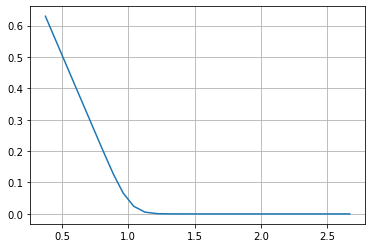

In [733]:
plt.plot(Knfft, C4, label='DFT')
plt.grid()

Text(0, 0.5, 'Call price')

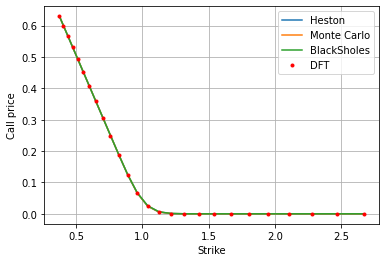

In [734]:
plt.plot(Kn, C1, label='Heston')
plt.plot(Kn, C2, label='Monte Carlo')
plt.plot(Kn, C3, label='BlackSholes')
plt.plot(Knfft, C4, '.r', label='DFT')

plt.legend()
plt.grid()
plt.xlabel("Strike")
plt.ylabel("Call price")

In [735]:
np.linalg.norm(C1 - C2) / np.linalg.norm(C1) * 100

0.0028229567332339373

In [736]:
np.linalg.norm(C - C2) / np.linalg.norm(C1) * 100

0.002830782756721239

In [737]:
np.linalg.norm(C4 - C2) / np.linalg.norm(C1) * 100

0.13054152659684384

In [738]:
np.linalg.norm(C4 - C1) / np.linalg.norm(C1) * 100

0.12996399108218618